In [103]:
# importing necessary libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re  
import seaborn as sns
sns.set_theme()
import string


In [104]:
df=pd.read_csv(r"D:\BFCAI\3rd\second term\NLP\Sections\dataset.csv")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


<function matplotlib.pyplot.show(close=None, block=None)>

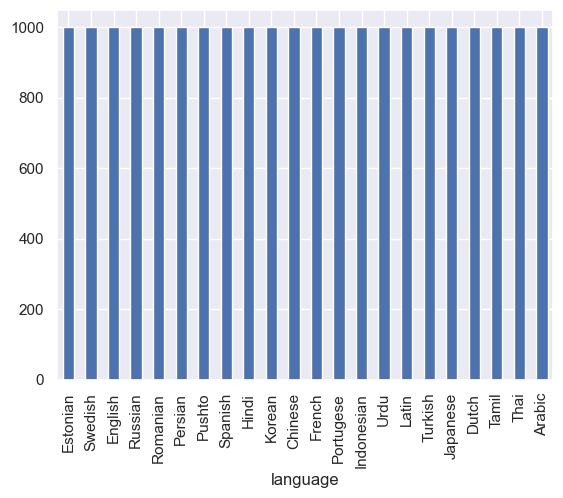

In [105]:
df['language'].value_counts().plot(kind = 'bar')
plt.show

In [106]:
def remove_punc(text):
    for pun in string.punctuation:
        text=text.replace(pun,"")
    text=text.lower()
    return(text)

In [107]:
df['Text']=df['Text'].apply(remove_punc)

In [108]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [109]:
df.isnull().sum()


Text        0
language    0
dtype: int64

In [110]:
df['language'].value_counts()


language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X=df.iloc[:,0]
Y=df.iloc[:,1]

In [113]:
X

0        klement gottwaldi surnukeha palsameeriti ning ...
1        sebes joseph pereira thomas  på eng the jesuit...
2        ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3        விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4        de spons behoort tot het geslacht haliclona en...
                               ...                        
21995    hors du terrain les années  et  sont des année...
21996    ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...
21997    con motivo de la celebración del septuagésimoq...
21998    年月，當時還只有歲的她在美國出道，以maik名義推出首張英文《baby i like》，由美...
21999     aprilie sonda spațială messenger a nasa șia î...
Name: Text, Length: 22000, dtype: object

In [114]:
Y

0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [116]:
from sklearn import feature_extraction

In [117]:
vec=feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer='char')

In [118]:
from sklearn import pipeline
from sklearn import linear_model

In [119]:


model_pipeline=pipeline.Pipeline([('vec',vec),('clf',linear_model.LogisticRegression())])

In [ ]:
model_pipeline.fit(X_train,Y_train)

In [ ]:
model_pipeline.classes_

In [ ]:
predict_val=model_pipeline.predict(X_test)


In [ ]:
from sklearn import metrics

In [ ]:
test_accuracy=metrics.accuracy_score(Y_test,predict_val)
print("Test accuracy : ",test_accuracy)

train_predict_val=model_pipeline.predict(X_train)

train_accuracy = metrics.accuracy_score(Y_train, train_predict_val)
print("Training Accuracy:", train_accuracy)


In [ ]:
metrics.confusion_matrix(Y_test,predict_val)

In [ ]:
model_pipeline.predict(['Hello My name is Ahmed'])

In [ ]:
import pickle

In [ ]:
new_file=open('model1.pckl','wb')
pickle.dump(model_pipeline,new_file)
new_file.close()

In [ ]:
import os

In [ ]:
os.listdir()

In [ ]:
model_pipeline.predict(['johnson was awarded an american institute of architects gold medal in  he became the first recipient of the pritzker architecture prize the most prestigious international architectural award'])

In [ ]:
model_pipeline.predict(['احمد يلعب كرة القدم'])

In [ ]:
model_pipeline.predict([' my  name is sayed  '])

In [ ]:
model_pipeline.predict(['سيجد الانسان النجاح'])

In [ ]:
model_pipeline.predict(['i love football'])

In [ ]:
model_pipeline.predict(['i love football'])